# Project: Investigate a Dataset: TMDB Investigations

## Table of Contents

* <a href="#intro">Introduction</a>
* <a href="#Imports">Imports</a>
* <a href="#wrangling">Data Wrangling</a>
* <a href="#Inspect">Inspect</a>
* <a href="#eda">Exploratory Data Analysis</a>
* <a href="#conclusions">Conclusions</a>

<a id='intro'></a>
## Introduction

> I've chosen to explore the TMDb movie data set for my project's analysis.  As noted in the overview and notes, "This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue."

### Dependent variables
>* Adjusted Revenue
>* Genre popularity

### Independent variables
>* Adjusted Budget
>* Year
>* Adjusted Revenue
>* Director


## Questions

* Which genres are most popular from year to year?
* Does a movie's budget have an impact on it's revenue?
    * Who are the most profitable directors?



<a id='Imports'></a>
### Import Statements 

In [175]:
#import pyplot with alias 'plt' for creating visualizations
import matplotlib.pyplot as plt
#import numpy for various 2d/1d mathmatical functions and data structures
import numpy as np
#import pandas for more 2d/1d mathmatical functions, data structures, and plotting functions
import pandas as pd
#Import seaborn as alias 'sns' to enhance pyplot visualizations
import seaborn as sns

#change default pandas formatting of floats(used for more legibile entries in the budget/revenue colums of imdb database)
pd.options.display.float_format = '{:,.2f}'.format

#magic words to allow matplotlib and pylab to provide the visualizations inline within the jupyter notebook cells
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

### Load your data
Here I used the built in read_csv function of pandas to bring in the tmdb csv file into a dataframe

In [176]:
#Reading the tmbdb csv file with pandas into a new dataframe named tmdb_df
tmdb_df = pd.read_csv('tmdb-movies.csv')

### Print out a few lines
Taking a look at the newly formed data frame

In [177]:
# Callling head function of the tmdb dataframe to return the first 3 lines of the dataframe
tmdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"


<a id='Inspect'></a>
### Perform operations to inspect data types and look for instances of missing or possibly errant data.

Below we call the pandas info function on the dataframe to see the data types of the columns. We can see there is:
* 10866 entries or 'rows'
* 21 columns
> * 4 columns with dtype float64
> * 6 columns with dtype int64
> * 11 columns with dtype object

Some of the columns have less than 10866 non-null entries:
* imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production companies

This means these fields contain some NaN values, so some of their data may be missing or errant

### General Properties

In [178]:
#Info function on dataframe to see data types and structure of the dataframe
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning 

>While cleaning I need to decide if the initial datatypes from the csv import are a good fit:
* __id__: int64 seems fine though I could change it to an object since mathmatical operations on the id values yields no relevant values(i.e. adding two id values together)
* __imdb_id, original_title, homepage, director, tagline, overview__: object seems good since these contains a mix a of letters and numbers
* __popularity, vote_average, budjet_adj, revenue_adj__: float64 looks good since they're numbers w/ decimals
* __budget, revenue, runtime, votecount__: int64 looks good since we may want to perform calculations on the numbers
* __cast, genres,keywords, production_companies__: object may need to be cleaned since there are multiple values separated by pipe characters
* __release_date__: object will likely want to change to datetime64 object
* __release_year__: int64 likely fine as an int64 since we will have release_date as a time dtype after cleaning

So initally, I will change the dtypes of the id and release date fields


In [179]:
#Fixing dtypes

#Here we assign the id field to be an object datatype 
tmdb_df['id'] = tmdb_df.id.astype(object)
#Set release date to be a pandas datatime dtype
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [180]:
#verifying dtype changes were applied
tmdb_df.loc[:,['id', 'release_date']].dtypes

id                      object
release_date    datetime64[ns]
dtype: object

Below we create a function, clean_multi_value, to avoid repetitive code

*(Rubric Criteria: Code Functionality"Does the project use good coding practices")*

In [181]:
#For using in dataframe apply function on multi-value fields
def clean_multivalue(s):
    return s.split('|')

In [182]:
#Looking over before apply
tmdb_df[['cast', 'genres', 'keywords', 'production_companies']].head(2)

,cast,genres,keywords,production_companies
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,monster|dna|tyrannosaurus rex|velociraptor|island,Universal Studios|Amblin Entertainment|Legenda...
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,future|chase|post-apocalyptic|dystopia|australia,Village Roadshow Pictures|Kennedy Miller Produ...


From the info function we saw the cast, genres, and keywords columns had some null entries which could cause problems later.To alleviate this issue we first apply a fillna function the the column and then apply the clean_multivalue function we just created.

In [183]:

#Use fillna to replace nan values with just empty string object using inplace to avoid needing assignment statement
tmdb_df.fillna(value="", inplace=True)

#applymap used to split the multi-valued fields into lists
tmdb_df[['cast', 'genres', 'keywords', 'production_companies']] = tmdb_df[['cast', 'genres', 'keywords', 'production_companies']].applymap(clean_multivalue)

In [184]:
#Check the updated structure
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj   

In [185]:
#Looking over after apply
tmdb_df[['cast', 'genres', 'keywords', 'production_companies']].head(2)

,cast,genres,keywords,production_companies
0,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Action, Adventure, Science Fiction, Thriller]","[monster, dna, tyrannosaurus rex, velociraptor...","[Universal Studios, Amblin Entertainment, Lege..."
1,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[Action, Adventure, Science Fiction, Thriller]","[future, chase, post-apocalyptic, dystopia, au...","[Village Roadshow Pictures, Kennedy Miller Pro..."


## Trimming

For the questions we're trying to answer, many of the data columns are not needed.  We will trim unused columns, and create a new dataframe that only includes the fields needed to answer it's respective question.

In [186]:
# Creating dataframe with only genres and release year as columns
genre_yr_df = tmdb_df[['genres','release_year']]

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most common from year-to-year?

In [187]:
genre_yr_df.head(2)

,genres,release_year
0,"[Action, Adventure, Science Fiction, Thriller]",2015
1,"[Action, Adventure, Science Fiction, Thriller]",2015


In order to analyze the categories we need to break down the lists from our applymap earlier.  We will do this with a get get dummies function to create a new frame that has columns for each category with a 1 or 0 to indicate whether the category was present for that particular entry.

In [188]:
#New dataframe clean_cat to hold the decompressed categories
clean_cat = pd.get_dummies(genre_yr_df.genres.apply(pd.Series).stack()).sum(level=0)


The logic of this is:

* .apply(Series) converts the series of lists to a dataframe
* .stack() puts everything in one column again (creating a multi-level index)
* pd.get_dummies( ) creating the dummies
* .sum(level=0) for remerging the different rows that should be one row (by summing up the second level, only keeping the original level (level=0))

credit(https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies)

In [189]:
#Renaming empty field to None
clean_cat.rename(columns = {'':'None'}, inplace=True)

In [190]:
#Taking a look at our new category dataframe
clean_cat.head()

,None,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [191]:
# Verifying the number of rows is correct
clean_cat.shape[0]

10866

In [192]:
# Taking a quick look at the counts of each category
clean_cat.sum().sort_values(ascending=False)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
None                 23
dtype: int64

To make our graphs a bit more legible we'll take a look at only the top 5 categories overall, across the years:
* Drama
* Comedy
* Thriller
* Action
* Romance

In [193]:
#Forming a new data frame in case we want to go back and do something with the original clean_cat dataframe
rq2 = pd.DataFrame(clean_cat,copy=True)

Here we go ahead and add the year column back onto the the categories

In [194]:
#inserting the release year column in the first position
rq2.insert(loc = 0, column = 'release_year', value = genre_yr_df['release_year'])

In [195]:
#verifiyng insert
rq2.head(2)

,release_year,None,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2015,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2015,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


Since we want to look at the data on a year to year basis we will perform a groupby on the dataframe for relase_year with the sum function to get a total of occurrences of each category for each year.

In [196]:
#create new dataframe from groupby
rq3 = rq2.groupby('release_year').sum()
#verify new dataframe looks like we want it
rq3.head()

,None,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
1960,0.00,8.00,5.00,0.00,8.00,2.00,0.00,13.00,3.00,2.00,...,5.00,7.00,1.00,0.00,6.00,3.00,0.00,6.00,2.00,6.00
1961,0.00,7.00,6.00,1.00,10.00,2.00,0.00,16.00,5.00,2.00,...,3.00,3.00,2.00,1.00,7.00,4.00,0.00,0.00,2.00,3.00
1962,0.00,8.00,7.00,0.00,5.00,3.00,0.00,21.00,2.00,1.00,...,4.00,5.00,1.00,4.00,5.00,2.00,0.00,7.00,3.00,3.00
1963,0.00,4.00,7.00,1.00,13.00,4.00,0.00,13.00,3.00,2.00,...,4.00,9.00,0.00,6.00,8.00,2.00,0.00,10.00,1.00,2.00
1964,0.00,5.00,5.00,2.00,16.00,10.00,0.00,20.00,4.00,4.00,...,3.00,6.00,5.00,4.00,9.00,4.00,0.00,9.00,3.00,1.00


To make analysis easier we will create a dataframe which has the ratios of each category relative to it's year's total number of categories.

This is to alleviate the issue of there being a dramatic increase in the number of movies made each year up until recent years. 

In [197]:
#Here we create a series that has the total of each of the rows
row_totals = rq3.sum(axis=1)
#We then divide the data frame by that series to get relative percents of categories for each year
percentage_df = rq3.div(row_totals, axis='index')

In [198]:
#number of years with data
percentage_df.shape[0]

56

In [199]:
#Verifying the new dataframe looks good
percentage_df.tail()

,None,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
2011,0.00,0.09,0.05,0.04,0.13,0.04,0.04,0.17,0.06,0.04,...,0.01,0.06,0.01,0.03,0.06,0.04,0.01,0.11,0.01,0.00
2012,0.00,0.08,0.04,0.03,0.14,0.04,0.04,0.18,0.03,0.03,...,0.01,0.08,0.02,0.03,0.06,0.04,0.01,0.13,0.01,0.00
2013,0.00,0.09,0.05,0.03,0.13,0.05,0.04,0.18,0.03,0.03,...,0.01,0.07,0.02,0.03,0.05,0.04,0.01,0.13,0.01,0.00
2014,0.00,0.09,0.05,0.02,0.13,0.04,0.05,0.19,0.03,0.02,...,0.01,0.07,0.02,0.02,0.06,0.04,0.01,0.12,0.02,0.00
2015,0.00,0.08,0.05,0.03,0.12,0.04,0.04,0.19,0.03,0.02,...,0.01,0.09,0.02,0.03,0.04,0.06,0.01,0.12,0.01,0.00


This percentage_df looks like it is now formatted for analysis so we will try to make a graph to look at the trends over the years

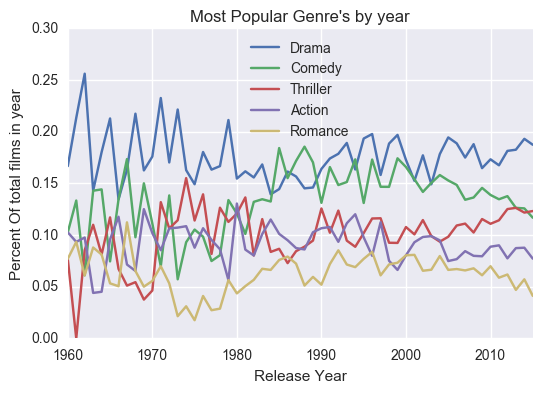

In [200]:
#Creating a plot for the top 5 Genres over the years
ax = percentage_df[['Drama','Comedy','Thriller','Action','Romance']].plot(title="Most Popular Genre's by year",
                                                                    )
ax.set_ylabel("Percent Of total films in year")
ax.set_xlabel("Release Year")

As we can see in the graph it appears that drama is the most popular genre most years, however there are a few years where Comedy is more popular. Below we take a look at which years Comedy surpasses Drama.

In [201]:
#Which years is Comedy more popular than Drama?
percentage_df[percentage_df.Comedy > percentage_df.Drama]

,None,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
1967,0.00,0.07,0.07,0.02,0.17,0.07,0.01,0.16,0.03,0.03,...,0.00,0.04,0.05,0.03,0.11,0.04,0.00,0.05,0.01,0.02
1985,0.00,0.10,0.10,0.01,0.18,0.05,0.00,0.14,0.04,0.05,...,0.00,0.05,0.01,0.01,0.08,0.06,0.00,0.09,0.01,0.01
1987,0.00,0.09,0.05,0.01,0.17,0.06,0.00,0.16,0.05,0.05,...,0.01,0.08,0.01,0.02,0.07,0.05,0.01,0.08,0.02,0.00
1988,0.00,0.09,0.04,0.02,0.19,0.06,0.01,0.15,0.05,0.04,...,0.01,0.10,0.02,0.02,0.05,0.05,0.01,0.09,0.02,0.00
1989,0.00,0.10,0.06,0.01,0.17,0.07,0.01,0.15,0.05,0.04,...,0.01,0.07,0.01,0.02,0.06,0.06,0.00,0.09,0.01,0.00
1994,0.00,0.12,0.06,0.02,0.17,0.05,0.00,0.16,0.07,0.05,...,0.01,0.03,0.01,0.02,0.07,0.04,0.01,0.09,0.01,0.02
2001,0.00,0.09,0.06,0.03,0.15,0.06,0.01,0.15,0.05,0.04,...,0.02,0.04,0.01,0.03,0.08,0.04,0.02,0.10,0.02,0.00
2003,0.00,0.10,0.06,0.04,0.15,0.06,0.01,0.15,0.06,0.04,...,0.01,0.03,0.01,0.03,0.07,0.06,0.00,0.10,0.01,0.01


Here we take a look at a stacked bar chart to visualize the data another way.  Note that the ratios won't add up to 1 since we've ommited genre's outside the top 5.

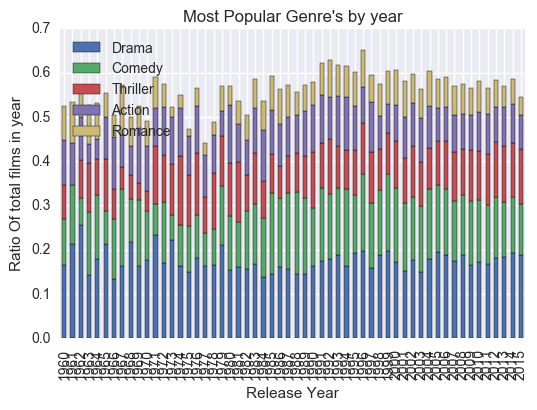

In [202]:
ax = percentage_df[['Drama','Comedy','Thriller','Action','Romance']].plot.bar(stacked=True,
                                                                        title="Most Popular Genre's by year")
ax.set_ylabel("Ratio Of total films in year")
ax.set_xlabel("Release Year")

One more angle to look at the data from.  Here we use a histogram to see the relative frequencies each category is at a particlar ratio of the yearly total.

Drama is clearly top-dog. Interestingly we can see here that even in Romance's peak year of popularity(1967) it still wasn't more popular than Comedy or Drama at their least popular years.

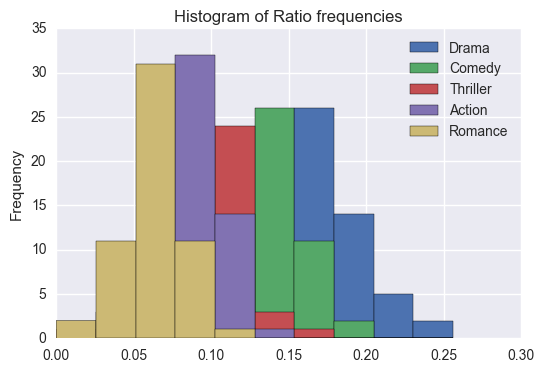

In [203]:
percentage_df[['Drama','Comedy','Thriller','Action','Romance']].plot.hist(title="Histogram of Ratio frequencies")

In [204]:
#Finding exact year Romance was at it's peak popularity
percentage_df[percentage_df.Romance > .1]

,None,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
1967,0.00,0.07,0.07,0.02,0.17,0.07,0.01,0.16,0.03,0.03,...,0.00,0.04,0.05,0.03,0.11,0.04,0.00,0.05,0.01,0.02


### Research Question 2  How often does a movie's inflation adjusted revenue not exceed it's  inflation adjusted budget? (How often are movies profitable?)

> Genre popularity could be a good way to analyze whether a movie would be profitable which led me to wonder what percent of these movies end up turning a profit?

Below we will trim our original dataframe from the csv so that we only have the fields that we need to answer this question.

In order to determine profit we'll use the budget_adj and revenue_adj columns.  Additionally we'll bring in the original title to use as the index so that we can look for anomolies in the data a bit easier

In [205]:
#creating a new dataframe to only hold relevent fields
budget_rev_df = tmdb_df[['original_title','budget_adj','revenue_adj']]
#setting the index
budget_rev_df.set_index('original_title',inplace=True)
#Verifying the new data frame structure
budget_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, Jurassic World to Manos: The Hands of Fate
Data columns (total 2 columns):
budget_adj     10866 non-null float64
revenue_adj    10866 non-null float64
dtypes: float64(2)
memory usage: 254.7+ KB


Above, we can see that the data doesn't have any non-null values, but it may have zero values that could skew the data

In [206]:
#Checking for number of rows with zero values
budget_rev_df[(budget_rev_df.budget_adj == 0) |
              (budget_rev_df.revenue_adj == 0)].shape[0]

7011

Yikes!  Unfortunately 7011 of the 10866 rows in the dataframe have zero values in either of the columns.  Luckily we'll still have ~3855 values to work with.

In [207]:
#Update our dataframe to only have rows that do not contain zero values
budget_rev_df = budget_rev_df[(budget_rev_df.budget_adj != 0) &
                              (budget_rev_df.revenue_adj != 0)]

In [208]:
#verifiying our update went through
budget_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3855 entries, Jurassic World to Fantastic Voyage
Data columns (total 2 columns):
budget_adj     3855 non-null float64
revenue_adj    3855 non-null float64
dtypes: float64(2)
memory usage: 90.4+ KB


That should help with accuracy when analyzing the data.  Now lets perform a describe function to look at some of the current statistics of the dataframe.

In [209]:
#Checking current state of dataframe
budget_rev_df.describe()

,budget_adj,revenue_adj
count,"3,855.00","3,855.00"
mean,"44,236,299.18","137,029,386.10"
std,"44,804,027.33","216,094,430.04"
min,0.97,2.37
25%,"13,090,528.47","18,341,233.69"
50%,"30,015,580.40","61,718,613.20"
75%,"60,613,069.68","163,240,089.71"
max,"425,000,000.00","2,827,123,750.41"


So it seems there is still some minor issues with the data. Notably the 'min' values for budget and revenue seem way too low.  We'll take a look at records under 1000 in either column too see if we can't get to the bottom of this.

I'm looking at values below 1000 specifically because I think some of the values might be in the 'numbers of millions'. Since to my knowledge there's no movie with a budget or revenue above a billion(1000 millions), I decided on 1000 as the threshold to use.

In [210]:
#Get a filtered look at the data frames lower values
budget_rev_df[(budget_rev_df.budget_adj < 1000) | (budget_rev_df.revenue_adj < 1000)]

,budget_adj,revenue_adj
original_title,,
Wanted,76.23,136.20
Boy,3.00,43.00
Angela's Ashes,32.73,17.02
Lost & Found,1.31,130.91
Dr. Horrible's Sing-Along Blog,"202,557.33",3.04
"Love, Wedding, Marriage",0.97,"1,335.83"
From Prada to Nada,90.15,"2,423,495.11"
William & Kate,19.39,14.54
The Sum of All Fears,82.43,233.97


It looks like some of the values here are being listed as 'number of millions' instead of the literal number.  I can't be certain that's true in all the cases, but I know for instance that "The Karate Kid, Part II" did not have a inflation-adjusted budget of $224 dollars.  I could either drop all these records or I could try to upscale them to what I think is the intended value.   Since we've already lost over 7000 records that contained zero entries I will opt for the latter option.

To do this I will first create a function for converting to millions, and then use an applymap with that function on the dataframe to fix the relvant entries

In [211]:
#conversion function to use in applymap
def convert_to_millions(x):
    if x >= 1000:
        return x
    elif x < 1000:
        return x*1000000

In [212]:
#Use applymap with our convert function we just defined to fix the data
budget_rev_df = budget_rev_df.applymap(convert_to_millions)

In [213]:
#Verify our applymap worked correctly
budget_rev_df[(budget_rev_df.budget_adj < 1000) | (budget_rev_df.revenue_adj < 1000)]

,budget_adj,revenue_adj
original_title,,


Good, so as verified above the offending entries were upscaled to what is hopefully their intended values.  With the data fixed to my liking we will now add a calculated profit column to the dataframe

In [214]:
#Adding calculated field profit_adj to dataframe
budget_rev_df['profit_adj'] = budget_rev_df.revenue_adj.subtract(budget_rev_df.budget_adj)

In [215]:
#Veriying that our new frame looks good
budget_rev_df.sort_values('profit_adj', ascending=False).head()

,budget_adj,revenue_adj,profit_adj
original_title,,,
Star Wars,"39,575,591.36","2,789,712,242.28","2,750,136,650.92"
Avatar,"240,886,902.89","2,827,123,750.41","2,586,236,847.52"
Titanic,"271,692,064.21","2,506,405,735.42","2,234,713,671.21"
The Exorcist,"39,289,276.63","2,167,324,901.20","2,128,035,624.57"
Jaws,"28,362,748.20","1,907,005,841.92","1,878,643,093.71"


We'll also generate another column that will have a truth value depending on the whether the profit column is positive.  I could define another function for the apply here but it's so basic I think a lambda will suffice.

In [216]:
#Generate is_profit column for with appy on on profit column
budget_rev_df['is_profit'] = budget_rev_df.profit_adj.apply(lambda x: x>0)

In [217]:
#check use value counts with normalize to get the ratio of true to false in the 'is_profit' column
budget_rev_df.is_profit.value_counts(normalize=True)

True    0.72
False   0.28
Name: is_profit, dtype: float64

As we see above roughly 72% of the movies in the set are profitable.  Only 28% of the time do movies lose money.  Now lets take a look at some visualizations

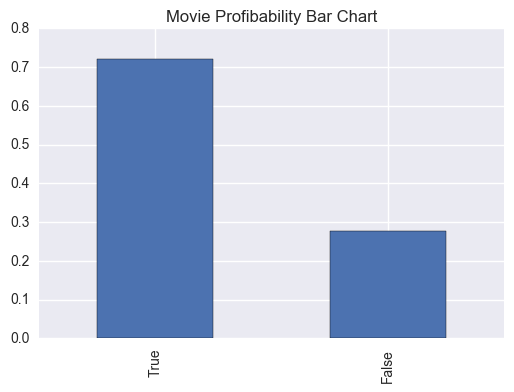

In [234]:
#Bar chart to visualize whether a movie is profitable
budget_rev_df.is_profit.value_counts(normalize=True).plot(kind='bar',
                                                         title="Movie Profibability Bar Chart")


<a id='q2graphs'></a>

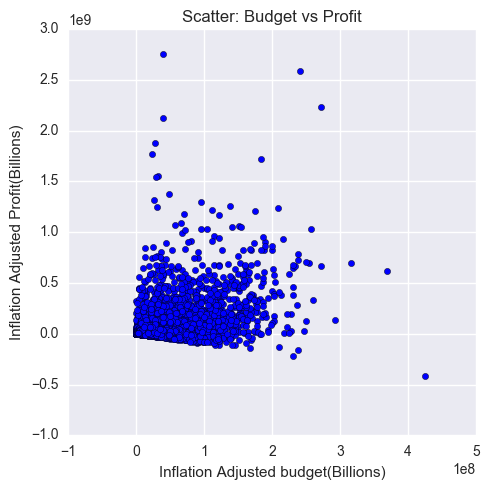

In [220]:
#creating a scatter plot to visualize the dataframe further
fig,ax = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(5, 5))

ax.scatter(x=budget_rev_df.budget_adj,y=budget_rev_df.profit_adj)
ax.set_title("Scatter: Budget vs Profit")
ax.set_xlabel('Inflation Adjusted budget(Billions)')
ax.set_ylabel('Inflation Adjusted Profit(Billions)')

Above we're able to see a fairly tight clustering with some potential outliers.

While we're looking looking at movie profits I was wondering who the most profitable directors are.  Below I quickly create a dataframe and graph to analyze that.

In [223]:
#Create a new data frame with budgets and revunues over 1000
director_profit_df = tmdb_df[tmdb_df.budget_adj > 1000]
director_profit_df = director_profit_df[(director_profit_df.revenue_adj > 1000)]
#calculate profit column
director_profit_df['net_director_profit_df'] = director_profit_df.revenue_adj - director_profit_df.budget_adj

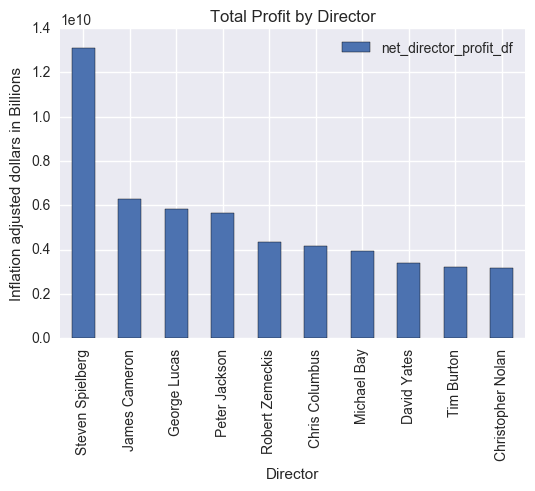

In [224]:
#Graph the data with a bar chart
grouped_director_df = director_profit_df.groupby('director').net_director_profit_df.sum()

ax = grouped_director_df.sort_values(inplace=False, ascending=False).head(10).plot(y='Total Profit',
                                                                   title='Total Profit by Director',
                                                                   kind='bar',
                                                                   legend=True)

ax.set_ylabel("Inflation adjusted dollars in Billions")
ax.set_xlabel("Director")

Wow! Financially speaking Steven Spielberg is in a league of his own.  More than double the total profits of second place James Cameron.

<a id='conclusions'></a>
## Conclusions

From our analysis here we are able to gain insight on the TMDB data set and answer questions we've posed.

For the first question, " Which genres are most popular from year to year?", we were able to see that the top 5 genre categories were:
* Drama
* Comedy
* Thriller
* Action
* Romance

Drama was the the most popular genre all but 8 of the 56 years for which there was data.  The only genre to be more popular than drama at any point was Comedy.  Notable that 4 of the 8 years that Comedy was more popular than drama were in the mid-to-late 80's(1985,1987,1988,1989).  Perhaps a particular set of comedic actors were popular during that time frame.

For the 2nd question, " How often does a movie's inflation adjusted revenue not exceed it's  inflation adjusted budget?", it was to discovered that the vast majority of the time the the movies from the IMDB data set do turn a profit.  72% of the movies on the list were profitable according to the data set.  Worth noting there is some possible issues with the data as a large number of the results were missing or had very low number for adjusted budget or adjusted revenue.  To minimize errors from this the dataset was groomed to remove entries with zero values and for budget/revenue values less than 1000 it was assumed that the amounts listed were for 'number of millions'.  With that assumption those numbers below 1000 were multiplied by 1 million to get what seemed to be more accurate numbers.

We also found out that the most profitable director of all time was Steven Spielberg.

While a lot of interesting information could be gleaned from this data set it became apparent during analysis that missing or incorrect values for a number of entries could limit the ability to make accurate conclusions on various questions. I am sure that data sets like this one are in use by many movie studios to do predictive analysis on potential movie projects to determine whether they will be profitable ahead of time.  I look forward to analyzing more data sets like this in the future and hope continue finding more answers to questions like the ones in this report. 
